## Introduction to Data Project Phase 2
__Parham Javan 810800008<br>__
__Yaser Azad 810800003__

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from scipy import stats

from scipy.stats import norm

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from torch.autograd import Variable
from tqdm import tqdm

RANDOM_SEED = 0
MAX_TIME_STEP = 30

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [10]:
df = pd.read_csv('Preprocessed Data/df_extract.csv', sep=',')


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6384 entries, 0 to 6383
Columns: 212 entries, bResult to killdiff_30
dtypes: int64(212)
memory usage: 10.3 MB
None


## Part 4: Evaluation Metric

Accuracy: If your goal is to predict match outcomes (win/loss), accuracy is a straightforward metric to evaluate how often your model predicts the correct result.

Precision, Recall, F1-score: If your task involves predicting specific outcomes (e.g., predicting wins for a particular team), precision (ability of the model not to label a negative sample as positive), recall (ability of the model to find all positive samples), and F1-score (harmonic mean of precision and recall) are useful metrics.

Log Loss: For probabilistic predictions (e.g., predicting the probability of winning a match), log loss measures the performance of a classification model where the prediction input is a probability value.

Mean Absolute Error (MAE) or Mean Squared Error (MSE): If your goal involves regression tasks such as predicting game duration or player performance scores, MAE or MSE can measure the average magnitude of errors in predictions.

### Why Accuracy?
Accuracy is a commonly used metric when dealing with binary classification tasks, such as predicting game outcomes (win/loss). It measures the proportion of correctly predicted outcomes among the total number of predictions made by the model. In the context of predicting League of Legends game outcomes(win/loss)

why not specific outcome is not important?
because one team wins and other loses so we have both and one doesnt have priority over the other one and if we calculate the diffrence the other way all results would reverse therefore Accuracy is chosen for main evaluation 

# Part 5: Model Training

## Method One: Neural Network

Epoch 1/50


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7773 - loss: 28.8627 - val_accuracy: 0.8190 - val_loss: 14.4622
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.7815 - loss: 11.4781 - val_accuracy: 0.7906 - val_loss: 10.3030
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.7932 - loss: 8.2601 - val_accuracy: 0.7818 - val_loss: 7.0862
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.7962 - loss: 5.8677 - val_accuracy: 0.7016 - val_loss: 6.5726
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.7922 - loss: 5.1207 - val_accuracy: 0.8014 - val_loss: 5.0332
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.8011 - loss: 4.1216 - val_accuracy: 0.7896 - val_loss: 4.9008
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.8107 - loss: 3.1919 - val_accuracy: 0.7319 - val_loss: 4.6538
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.8085 - loss: 3.1465 - val_accur

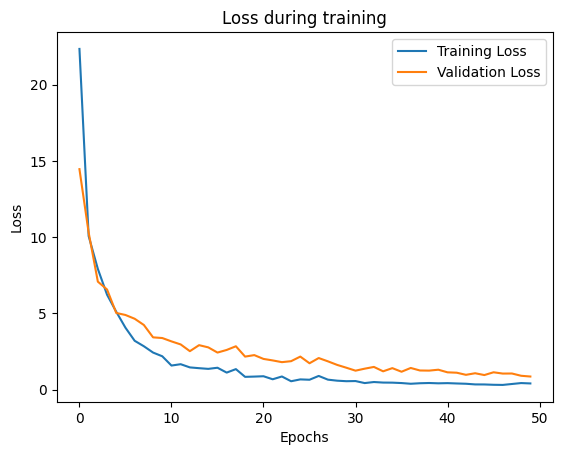

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step
              precision    recall  f1-score   support

     Class 0       0.81      0.77      0.79       585
     Class 1       0.82      0.85      0.83       692

    accuracy                           0.81      1277
   macro avg       0.81      0.81      0.81      1277
weighted avg       0.81      0.81      0.81      1277



In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming df is already defined and loaded with your data
X = df.iloc[:, 2:]
y = df['bResult'].values

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer and first hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))


## Method Two: Logistic Regression for outcome

Accuracy: 0.8488645262333594
Precision: 0.8589928057553957
Recall: 0.8627167630057804
F1-score: 0.8608507570295602


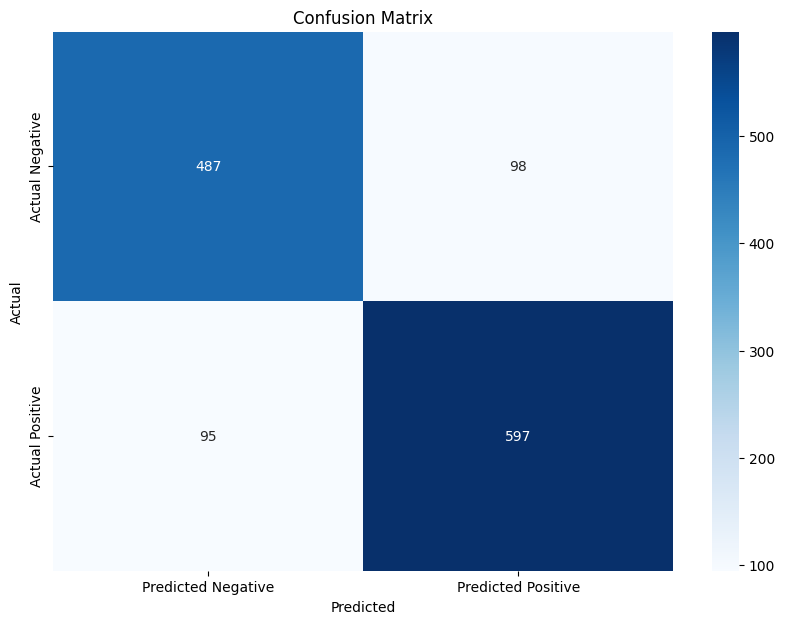

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset

# Selecting all columns except the first two for X (features)
X = df.iloc[:, 2:]  # iloc[:, 2:] selects all rows and columns from index 2 onwards
y = df['bResult'].values  # target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if necessary
model.fit(X_train, y_train)

# Error plot during training (logistic regression with sklearn doesn't provide loss curve)
# Sklearn LogisticRegression does not have loss_curve_ attribute.

# Make predictions
y_pred = model.predict(X_test)

# Model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Method Three: Decision Tree

Accuracy: 0.7659
Precision: 0.7885
Recall: 0.7760
F1 Score: 0.7822


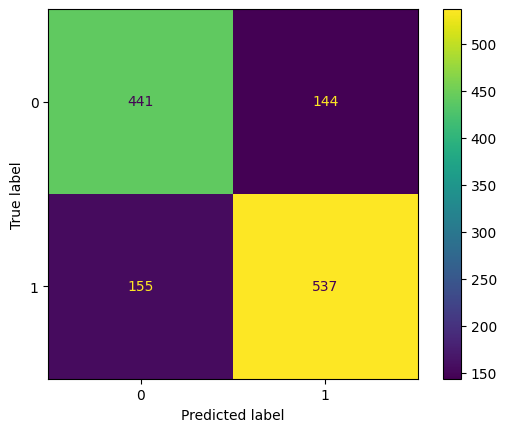

           Feature  Importance
29     golddiff_30    0.541639
59   dragondiff_30    0.016491
209    killdiff_30    0.016110
18     golddiff_19    0.016007
22     golddiff_23    0.015842
..             ...         ...
119  heralddiff_30    0.000000
118  heralddiff_29    0.000000
116  heralddiff_27    0.000000
115  heralddiff_26    0.000000
0       golddiff_1    0.000000

[210 rows x 2 columns]


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Selecting all columns except the first two for X (features)
X = df.iloc[:, 2:]
y = df['bResult'].values  # target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plotting the confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

# Determine feature importance
feature_importances = clf.feature_importances_

# Create a DataFrame to display the feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Print the most important features
print(features_df)


## Method 3: SVM

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Selecting all columns except the first two for X (features)
X = df.iloc[:, 2:]  # iloc[:, 2:] selects all rows and columns from index 2 onwards
y = df['bResult'].values  # target variable

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_clf = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_clf.fit(X_train, y_train)

# Predict on test data
y_pred = svm_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

# Classification report (precision, recall, f1-score)
print(classification_report(y_test, y_pred))


Accuracy on test set: 0.83
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       585
           1       0.84      0.85      0.85       692

    accuracy                           0.83      1277
   macro avg       0.83      0.83      0.83      1277
weighted avg       0.83      0.83      0.83      1277



## Method Four: KNN

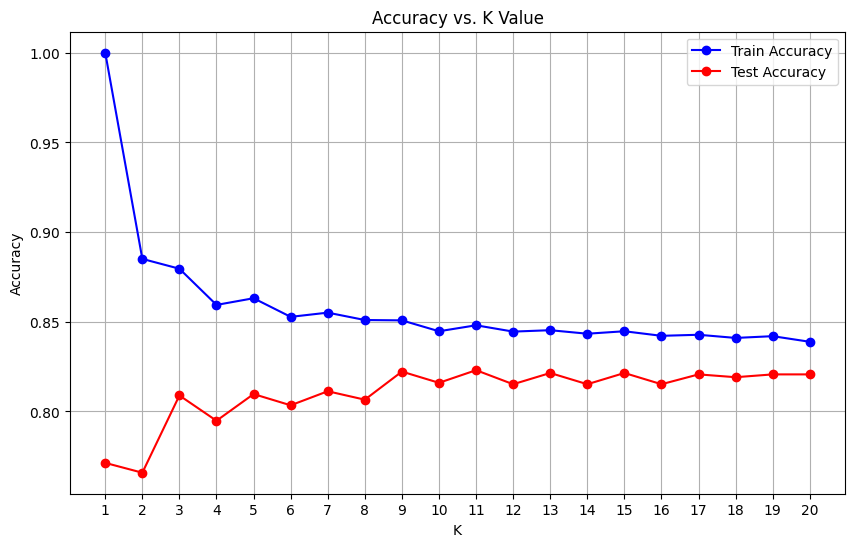

Accuracy: 0.8097

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       585
           1       0.82      0.83      0.82       692

    accuracy                           0.81      1277
   macro avg       0.81      0.81      0.81      1277
weighted avg       0.81      0.81      0.81      1277

Confusion Matrix:
[[462 123]
 [120 572]]


In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Selecting all columns except the first two for X (features)
X = df.iloc[:, 2:]  # Features

# Target variable
y = df['bResult'].values  # Target

# Splitting data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize kNN classifier (let's start with k=5)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn.fit(X_train, y_train)

# Predictions on the test set
y_pred = knn.predict(X_test)

# Error plot during training (in this case, we can use accuracy as the metric)
train_accuracy = []
test_accuracy = []

# Calculating accuracy for different values of k (let's say from 1 to 20)
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

# Plotting accuracy vs k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracy, marker='o', linestyle='-', color='b', label='Train Accuracy')
plt.plot(k_values, test_accuracy, marker='o', linestyle='-', color='r', label='Test Accuracy')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Model performance on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}\n')

# If classification, report precision, recall, and f1-score
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

## Logistic Regression is best model with 84% Accuracy